# Proyecto Sprint 8 – Análisis de datos de viajes en Chicago
En este proyecto se analizan los datos de viajes de taxi en Chicago con el objetivo de identificar patrones en la demanda, zonas más transitadas y posibles factores que influyen en la duración de los viajes. Además, se realiza una prueba de hipótesis para determinar el impacto de las condiciones climáticas en los tiempos de traslado.


## Importación de librerías y carga de datos
Se importan las librerías necesarias para el análisis y se cargan los datasets proporcionados.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
df_loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')

## Exploración y verificación de los datos
Se examinan las primeras filas de cada dataset, su estructura y tipos de datos para asegurar que estén listos para el análisis.


In [4]:
print("=== Empresas de taxis ===")
display(df_companies.head())
print(df_companies.info())
print(df_companies.describe())

print("\n=== Barrios ===")
display(df_neighborhoods.head())
print(df_neighborhoods.info())
print(df_neighborhoods.describe())

=== Empresas de taxis ===


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

=== Barrios ===


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


## Análisis exploratorio de datos
En esta sección se analizan las empresas de taxis y los barrios con mayor cantidad de viajes finalizados, identificando patrones de comportamiento en la movilidad urbana.


In [5]:
df_companies['trips_amount'] = df_companies['trips_amount'].astype(int)
df_neighborhoods['average_trips'] = df_neighborhoods['average_trips'].astype(float)

In [6]:
top10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
print("\nTop 10 barrios por número de finalizaciones:")
display(top10_neighborhoods)



Top 10 barrios por número de finalizaciones:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


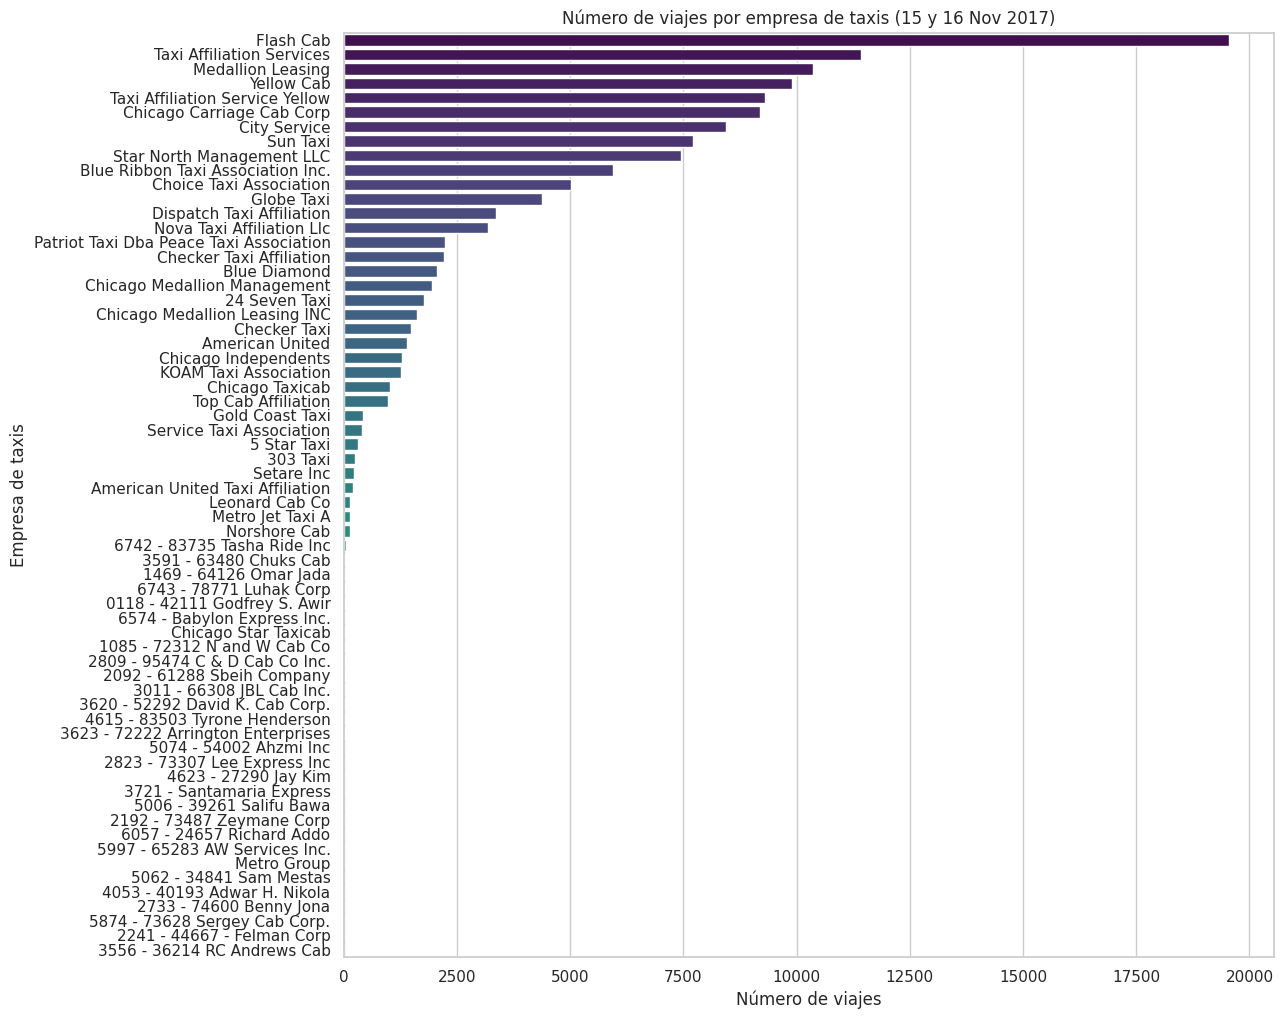

In [7]:
plt.figure(figsize=(12,12))
sns.barplot(x='trips_amount', y='company_name', data=df_companies.sort_values('trips_amount', ascending=False), palette='viridis')
plt.title('Número de viajes por empresa de taxis (15 y 16 Nov 2017)')
plt.xlabel('Número de viajes')
plt.ylabel('Empresa de taxis')
plt.show()

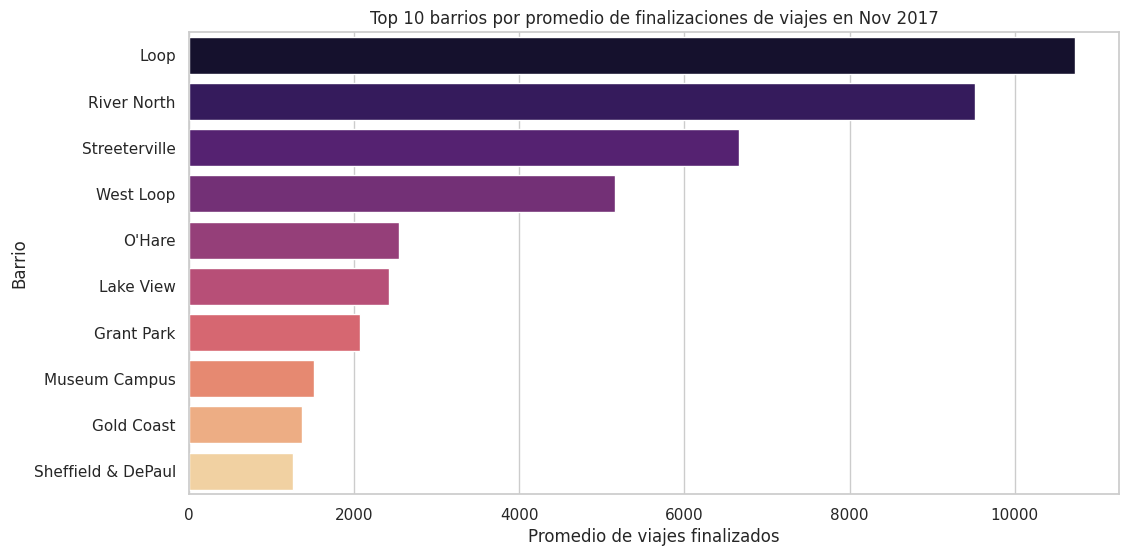

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top10_neighborhoods, palette='magma')
plt.title('Top 10 barrios por promedio de finalizaciones de viajes en Nov 2017')
plt.xlabel('Promedio de viajes finalizados')
plt.ylabel('Barrio')
plt.show()

## Prueba de hipótesis
Se analiza si la duración promedio de los viajes desde el Loop hasta el Aeropuerto O’Hare cambia significativamente durante los sábados lluviosos.


In [9]:
df_loop_ohare['start_ts'] = pd.to_datetime(df_loop_ohare['start_ts'])


In [10]:
df_saturdays_rain = df_loop_ohare[
    (df_loop_ohare['start_ts'].dt.dayofweek == 5) &  # sábado
    (df_loop_ohare['weather_conditions'] == 'Bad')   # lluvia/tormenta
]


In [13]:
"""
Hipótesis:
H0 (nula): La duración promedio de los viajes los sábados lluviosos es igual a la duración promedio general.
H1 (alternativa): La duración promedio de los viajes los sábados lluviosos es diferente de la duración promedio general.
"""


'\nHipótesis:\nH0 (nula): La duración promedio de los viajes los sábados lluviosos es igual a la duración promedio general.\nH1 (alternativa): La duración promedio de los viajes los sábados lluviosos es diferente de la duración promedio general.\n'

In [14]:
# Duración general
overall_mean = df_loop_ohare['duration_seconds'].mean()

# Duración sábados lluviosos
saturday_rain_durations = df_saturdays_rain['duration_seconds']

# Nivel de significación
alpha = 0.05

# Prueba t de una muestra (comparando la media de los sábados lluviosos con la media general)
t_stat, p_value = stats.ttest_1samp(saturday_rain_durations, overall_mean)

print("Duración promedio general:", overall_mean)
print("Duración promedio sábados lluviosos:", saturday_rain_durations.mean())
print("t-statistic:", t_stat)
print("p-value:", p_value)


Duración promedio general: 2071.7312734082398
Duración promedio sábados lluviosos: 2427.2055555555557
t-statistic: 6.6118043471955374
p-value: 4.224120813822628e-10


In [15]:
if p_value < alpha:
    print("\nSe rechaza H0: La duración promedio de los viajes los sábados lluviosos es significativamente diferente de la media general.")
else:
    print("\nNo se rechaza H0: No hay evidencia suficiente para decir que la duración promedio de los viajes los sábados lluviosos difiere de la media general.")


Se rechaza H0: La duración promedio de los viajes los sábados lluviosos es significativamente diferente de la media general.


## Conclusiones

**El análisis de los viajes de taxi en Chicago mostró que unas pocas empresas concentran la mayoría de los servicios y que los barrios más populares para finalizar recorridos son zonas centrales y de alta actividad, como Loop y River North. Además, la prueba estadística confirmó que los sábados lluviosos los viajes desde el Loop hasta el Aeropuerto O’Hare duran significativamente más que el promedio general, lo que demuestra que las condiciones climáticas influyen en la duración y eficiencia del servicio. Estos hallazgos evidencian patrones importantes para optimizar la gestión del transporte y la planificación urbana.**